<a href="https://colab.research.google.com/github/furkanonat/DS-Unit-2-Applied-Modeling/blob/master/module3-permutation-boosting/Furkan_Onat_LS_DS_233_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os

In [14]:
from google.colab import files
uploaded = files.upload()

Saving freMTPL2freq.csv to freMTPL2freq.csv


In [0]:
df = pd.read_csv('freMTPL2freq.csv')


In [0]:
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [0]:
df.isnull().sum()

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64

In [0]:
import sys
!{sys.executable} -m pip install pandas-profiling


In [0]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

profile



In [0]:
# Adding a feature for annualized claim frequency

df['Frequency'] = df['ClaimNb'] /df['Exposure']
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,Frequency
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,10.000000
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1.298701
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1.333333
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,11.111111
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1.190476


In [0]:
df['Frequency'].value_counts(normalize=True)

0.000000     0.949765
1.000000     0.015745
2.000000     0.001621
12.500000    0.000783
2.040816     0.000736
               ...   
3.529412     0.000001
19.512195    0.000001
6.000000     0.000001
4.477612     0.000001
8.108108     0.000001
Name: Frequency, Length: 241, dtype: float64

In [0]:
df['Frequency'].nunique()

241

In [0]:
df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Frequency
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,0.263964
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,4.593915
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,732.000000


In [0]:
df['Exposure'].value_counts()

1.00    168125
0.08     44670
0.07     12969
0.24     12950
0.50     12497
         ...  
1.88         1
1.70         1
1.62         1
1.82         1
1.92         1
Name: Exposure, Length: 187, dtype: int64

In [0]:
df['ClaimNb'].value_counts()

0     643953
1      32178
2       1784
3         82
4          7
11         3
5          2
16         1
9          1
8          1
6          1
Name: ClaimNb, dtype: int64

In [0]:
df.dtypes

IDpol         float64
ClaimNb         int64
Exposure      float64
Area           object
VehPower        int64
VehAge          int64
DrivAge         int64
BonusMalus      int64
VehBrand       object
VehGas         object
Density         int64
Region         object
Frequency     float64
dtype: object

In [0]:
df.nunique()

IDpol         678013
ClaimNb           11
Exposure         187
Area               6
VehPower          12
VehAge            78
DrivAge           83
BonusMalus       115
VehBrand          11
VehGas             2
Density         1607
Region            22
Frequency        241
dtype: int64

#### Model 1 
Target= ClaimNb
Model= DecisionTree Classifier
Evaluation Metric. = Validation Accuracy
Description = Make ClaimNb feature 3-class feature
              Added Frequency Feature


In [0]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
df_model_1 = df.copy()

In [0]:
df_model_1['ClaimNb'].value_counts(normalize=True)

0     0.949765
1     0.047459
2     0.002631
3     0.000121
4     0.000010
11    0.000004
5     0.000003
16    0.000001
9     0.000001
8     0.000001
6     0.000001
Name: ClaimNb, dtype: float64

In [0]:
df_model_1['ClaimNb'].value_counts()

0     643953
1      32178
2       1784
3         82
4          7
11         3
5          2
16         1
9          1
8          1
6          1
Name: ClaimNb, dtype: int64

In [0]:
# I will create a new column for number of claims per policy.
df_model_1['ClaimNb_Adj'] = df_model_1['ClaimNb']

In [0]:
df_model_1.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,Frequency,ClaimNb_Adj
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,10.000000,1
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1.298701,1
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1.333333,1
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,11.111111,1
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1.190476,1


In [0]:
# I modify the new 'ClaimNb' column to have just 3 classes : 'no claim', 'once', 'more than once'. 
df_model_1['ClaimNb_Adj'] = df_model_1['ClaimNb_Adj'].replace({0: 'no claim', 1: 'once', 2: 'more than once', 3: 'more than once', 4: 'more than once', 11: 'more than once', 5: 'more than once', 16: 'more than once', 9: 'more than once', 8: 'more than once', 6: 'more than once'})
df_model_1.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,Frequency,ClaimNb_Adj
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,10.000000,once
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1.298701,once
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1.333333,once
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,11.111111,once
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1.190476,once


In [0]:
# I will use "ClaimNb_Adj" feature as the target for the model
y = df_model_1['ClaimNb_Adj']

In [0]:
# Baseline for the majority class
df_model_1['ClaimNb_Adj'].value_counts(normalize=True)

no claim          0.949765
once              0.047459
more than once    0.002776
Name: ClaimNb_Adj, dtype: float64

In [0]:
df_model_1.dtypes

IDpol          float64
ClaimNb          int64
Exposure       float64
Area            object
VehPower         int64
VehAge           int64
DrivAge          int64
BonusMalus       int64
VehBrand        object
VehGas          object
Density          int64
Region          object
Frequency      float64
ClaimNb_Adj     object
dtype: object

In [0]:
# Split for test and train
train, test = train_test_split(df_model_1, train_size=0.80, test_size=0.20, stratify=df_model_1['ClaimNb_Adj'], random_state=42)

train.shape, test.shape

((542410, 14), (135603, 14))

In [0]:
# Split for train and val 
train, val = train_test_split(train, train_size = 0.80, test_size=0.20, stratify=train['ClaimNb_Adj'], random_state=42)

train.shape, val.shape

((433928, 14), (108482, 14))

In [0]:
def wrangle(X):
    # Drop IDpol since it doesn't have any explanatory power
    # Drop ClaimNb and Frequency as they are a function of our target.
    column_drop = ['IDpol','ClaimNb', 'Frequency']
    X = X.drop(columns=column_drop)
    return X

In [0]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
train.head()

,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNb_Adj
473050,0.08,D,10,11,35,50,B2,Regular,1398,R24,no claim
385695,1.00,E,5,6,64,50,B5,Regular,4128,R52,no claim
368650,0.71,A,6,3,41,57,B12,Diesel,18,R74,no claim
32821,1.00,D,4,13,38,78,B1,Regular,1326,R93,no claim
520623,0.87,E,4,1,72,50,B12,Regular,7259,R31,no claim


In [0]:
# Arranging features matrix and y target vector
target = 'ClaimNb_Adj'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth = 3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9497704688335392


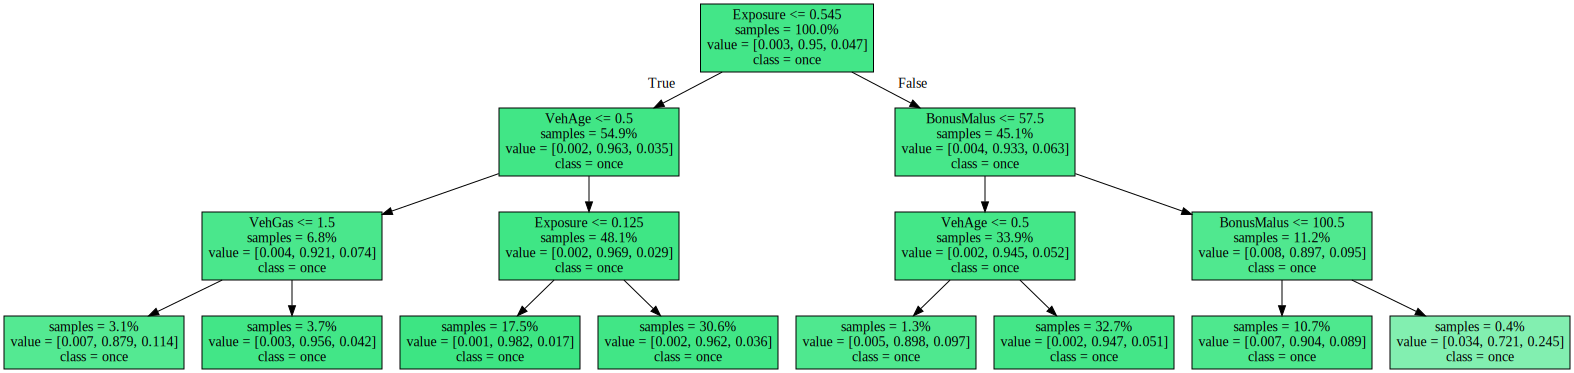

In [0]:
import graphviz 
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(tree,
                          out_file=None,
                          feature_names=X_train.columns,
                          class_names=y_train.unique().astype(str),
                          filled=True,
                           impurity=False,
                           proportion=True
                          )
graphviz.Source(dot_data)
                        
                       

In [0]:
y.value_counts(normalize=True)

no claim          0.949765
once              0.047459
more than once    0.002776
Name: ClaimNb_Adj, dtype: float64

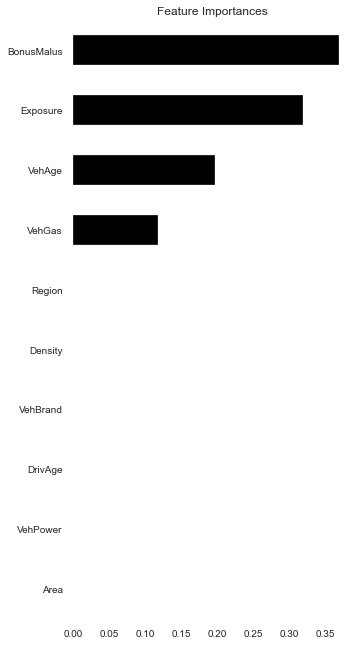

In [0]:
# Getting feature importances
rf = pipeline.named_steps['decisiontreeclassifier']
importances = pd.Series(rf.feature_importances_,X_train.columns)

# plot feature importances
%matplotlib inline

n=11
plt.figure(figsize=(5,n))
plt.title("Feature Importances")
importances.sort_values()[-n:].plot.barh(color='black');


In [0]:
importances.sort_values(ascending=False)

BonusMalus    0.368353
Exposure      0.317980
VehAge        0.196847
VehGas        0.116820
Region        0.000000
Density       0.000000
VehBrand      0.000000
DrivAge       0.000000
VehPower      0.000000
Area          0.000000
dtype: float64

In [0]:
# Predict on Test
y_pred = pipeline.predict(X_test)
y_pred.shape, y_test.shape

((135603,), (135603,))

In [0]:
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))


Train Accuracy 0.949763555244188
Validation Accuracy 0.9497704688335392


A to Assignment Q: Validation Accuracy of Decision Tree Classifier model beats baseline narrowly as the majority class had a frequency of 94.9765%.

In [0]:
from sklearn.metrics import accuracy_score


# print the accuracy
accuracy = accuracy_score(y_pred, y_test)

print("Accuracy : %.4f%%" % (accuracy * 100.0))

Accuracy : 94.9765%


In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[     0    376      0]
 [     0 128791      0]
 [     0   6436      0]]


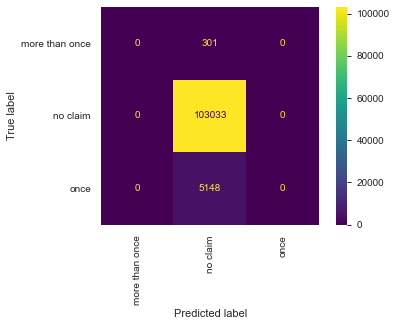

In [0]:
# Explanatory graph: Confusion Matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, X_val, y_val, values_format='.0f', xticks_rotation='vertical')

In [0]:
# import the metric
from sklearn.metrics import classification_report

# print classification report
print("Classification Report:\n\n", classification_report(y_test, y_pred))

/Users/fonat/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:

                 precision    recall  f1-score   support

more than once       0.00      0.00      0.00       376
      no claim       0.95      1.00      0.97    128791
          once       0.00      0.00      0.00      6436

      accuracy                           0.95    135603
     macro avg       0.32      0.33      0.32    135603
  weighted avg       0.90      0.95      0.93    135603



### Getting my model's permutation importances

In [0]:
transformers = make_pipeline(ce.OrdinalEncoder(), 
                             SimpleImputer(strategy='median'))

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model=DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=5, 
    random_state=42)

permuter.fit(X_val_transformed, y_val)

/Users/fonat/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/fonat/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(cv='prefit',
                      estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                    

In [0]:
feature_names= X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

BonusMalus    0.012809
DrivAge       0.009434
Density       0.008116
Exposure      0.007894
VehPower      0.005824
VehAge        0.005726
Region        0.005348
VehBrand      0.004679
VehGas        0.002625
Area          0.001820
dtype: float64

In [0]:
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0128 ± 0.0010,BonusMalus
0.0094 ± 0.0009,DrivAge
0.0081 ± 0.0007,Density
0.0079 ± 0.0014,Exposure
0.0058 ± 0.0015,VehPower
0.0057 ± 0.0012,VehAge
0.0053 ± 0.0013,Region
0.0047 ± 0.0011,VehBrand
0.0026 ± 0.0003,VehGas
0.0018 ± 0.0003,Area


### Model 2: Xgboost

In [0]:
from xgboost import XGBClassifier

pipeline = make_pipeline(ce.OrdinalEncoder(), 
                         XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1))

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Area', 'VehBrand', 'VehGas', 'Region'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Area',
                                          'data_type': dtype('O'),
                                          'mapping': D      1
E      2
A      3
C      4
B      5
F      6
NaN   -2
dtype: int64},
                                         {'col': 'VehBrand',
                                          'data_type': dtype('O'),
                                          'mapping': B2      1
B5      2
B12     3
B1      4
B13     5
B4      6
B10     7
B11     8
B3      9
B6     10
B14    11
Na...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_

In [0]:
# Validation accuracy
y_pred = pipeline.predict(X_val)
print('Validation Accuracy is ', accuracy_score(y_val,y_pred))

Validation Accuracy is  0.9497704688335392


In [0]:
# Validation accuracy of Decision Tree Classifier is 0.9497704688335392
# which is same with Xgboost model's validation accuracy. 